# Numpy -  multidimensional data arrays

#### This introduction to numpy was taken from

J.R. Johansson (jrjohansson at gmail.com)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

This work is licensed under a Creative Commons Attribution 3.0 Unported License.

In [1]:
# what is this line all about ?!? We will go into detail later
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# this line is only for people with a retina capable display
# %config InlineBackend.figure_format = 'retina'

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module, using for example:

**Question: Why is the next command okay in this tutorial?**

The recommended way is to use
```py
import numpy as np

# and then put np. before numpy commands
v = np.array([1,2,3,4])
```

In [3]:
from numpy import *

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [4]:
# a vector: the argument to the array function is a Python list
v = array([1,2,3,4])

v

array([1, 2, 3, 4])

In [5]:
# a matrix: the argument to the array function is a nested Python list
M = array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [6]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [7]:
v.shape

(4,)

In [8]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [9]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [10]:
shape(M)

(2, 2)

In [11]:
size(M)

4

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [12]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [13]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [14]:
M = array([[1, 2], [3, 4]], dtype=complex)

M

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

**Exercise**

Create a python list of integers using `list` and `range`. Convert this list to a numpy array

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [15]:
# create a range

x = arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
x = arange(-1, 1, 0.1)

x

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

#### linspace and logspace

In [17]:
# using linspace, both end points ARE included
linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [18]:
logspace(0, 10, 10, base=e)

array([  1.00000000e+00,   3.03773178e+00,   9.22781435e+00,
         2.80316249e+01,   8.51525577e+01,   2.58670631e+02,
         7.85771994e+02,   2.38696456e+03,   7.25095809e+03,
         2.20264658e+04])

#### mgrid

In [19]:
x, y = mgrid[0:5, 0:5] # similar to meshgrid in MATLAB

In [20]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [21]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### random data

In [22]:
from numpy import random

In [23]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[ 0.45673043,  0.13433286,  0.26900766,  0.72404166,  0.19297248],
       [ 0.26307391,  0.16408589,  0.77560075,  0.21635463,  0.35422989],
       [ 0.4220523 ,  0.09743199,  0.71889133,  0.25011684,  0.12677707],
       [ 0.51433842,  0.39547225,  0.83370104,  0.1434772 ,  0.8618274 ],
       [ 0.92897658,  0.0091813 ,  0.41844353,  0.70372107,  0.29413083]])

In [24]:
# standard normal distributed random numbers
random.randn(5,5)

array([[ 0.61195686, -1.40257553, -0.0170509 , -0.32772459,  0.11667898],
       [-1.37236589, -0.33168176, -2.21052849,  1.69656378, -0.6605443 ],
       [-1.16235852, -0.15062618, -0.20438148,  2.69979508,  0.79564695],
       [-1.20732294, -0.10780152,  1.16084135,  1.04778829,  0.49390722],
       [-0.3331248 , -1.21459858,  0.24453702,  0.96119887,  0.09999129]])

**Exercise**

Create a list of 1000000 (1M) random numbers in [0,1] named `long_random` and check the time it takes to make these by putting `%%time` in the first line of the cell.

#### diag

In [25]:
# a diagonal matrix
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [26]:
# diagonal with offset from the main diagonal
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [27]:
zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [28]:
ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

What does the next line do? Lines starting with a `!` will mean this line is executed in the `Terminal`. So in therory you could start another jupyter server by executing the cell

```
!jupyter notebook
```

The command `head` will show the first 10 lines of the file given.

In [29]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [30]:
data = genfromtxt('stockholm_td_adj.dat')

In [31]:
data.shape

(77431, 7)

We will discuss plotting later. Feel free to try out some things if you want to.

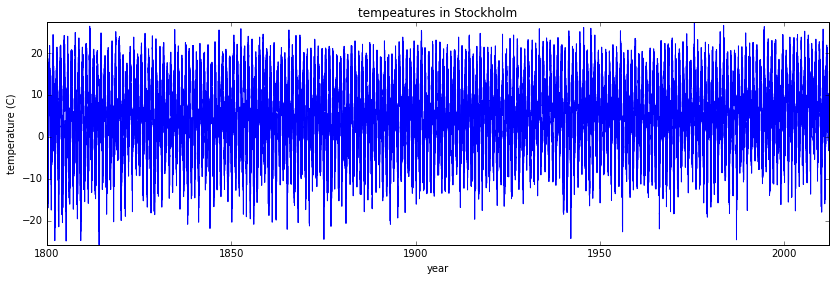

In [32]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [33]:
M = random.rand(3,3)

M

array([[ 0.46545898,  0.6759383 ,  0.0270581 ],
       [ 0.1271816 ,  0.74578486,  0.72745954],
       [ 0.97061291,  0.9435812 ,  0.42386434]])

In [34]:
savetxt("random-matrix.csv", M)

In [35]:
!cat random-matrix.csv

4.654589754456259776e-01 6.759383039216961819e-01 2.705810340951264603e-02
1.271816014936582029e-01 7.457848603755165007e-01 7.274595390182955201e-01
9.706129127448037686e-01 9.435812028625181203e-01 4.238643408382859468e-01


In [36]:
savetxt("random-matrix.csv", M, fmt='%.5f') # fmt specifies the format

!cat random-matrix.csv

0.46546 0.67594 0.02706
0.12718 0.74578 0.72746
0.97061 0.94358 0.42386


### Numpy's native file format

Useful when storing and reading back numpy array data. Use the functions `numpy.save` and `numpy.load`:

In [37]:
save("random-matrix.npy", M)

!file random-matrix.npy

random-matrix.npy: data


In [38]:
load("random-matrix.npy")

array([[ 0.46545898,  0.6759383 ,  0.0270581 ],
       [ 0.1271816 ,  0.74578486,  0.72745954],
       [ 0.97061291,  0.9435812 ,  0.42386434]])

## More properties of the numpy arrays

In [39]:
M.itemsize # bytes per element

8

In [40]:
M.nbytes # number of bytes

72

In [41]:
M.ndim # number of dimensions

2

**Exercise**

Get the size of the `long_random` array and compute the bytes per number, does that make sense? (It should.)

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices:

In [42]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [43]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

0.7457848603755165

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [44]:
M

array([[ 0.46545898,  0.6759383 ,  0.0270581 ],
       [ 0.1271816 ,  0.74578486,  0.72745954],
       [ 0.97061291,  0.9435812 ,  0.42386434]])

In [45]:
M[1]

array([ 0.1271816 ,  0.74578486,  0.72745954])

The same thing can be achieved with using `:` instead of an index: 

In [46]:
M[1,:] # row 1

array([ 0.1271816 ,  0.74578486,  0.72745954])

In [47]:
M[:,1] # column 1

array([ 0.6759383 ,  0.74578486,  0.9435812 ])

We can assign new values to elements in an array using indexing:

In [48]:
M[0,0] = 1

In [49]:
M

array([[ 1.        ,  0.6759383 ,  0.0270581 ],
       [ 0.1271816 ,  0.74578486,  0.72745954],
       [ 0.97061291,  0.9435812 ,  0.42386434]])

In [50]:
# also works for rows and columns
M[1,:] = 0
M[:,2] = -1

In [51]:
M

array([[ 1.        ,  0.6759383 , -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.97061291,  0.9435812 , -1.        ]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [52]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [53]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [54]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [55]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [56]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [57]:
A[:3] # first three elements

array([ 1, -2, -3])

In [58]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [59]:
A = array([1,2,3,4,5])

In [60]:
A[-1] # the last element in the array

5

In [61]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [62]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [63]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [64]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [65]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [66]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [67]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [68]:
row_mask = array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [69]:
# same thing
row_mask = array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [70]:
x = arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [71]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [72]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

## Functions for extracting data from arrays and creating arrays

### where

The index mask can be converted to position index using the `where` function

In [73]:
indices = where(mask)

indices

(array([11, 12, 13, 14]),)

In [74]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [75]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [76]:
diag(A, -1)

array([10, 21, 32, 43])

### take

The `take` function is similar to fancy indexing described above:

In [77]:
v2 = arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [78]:
row_indices = [1, 3, 5]
v2[row_indices] # fancy indexing

array([-2,  0,  2])

In [79]:
v2.take(row_indices)

array([-2,  0,  2])

But `take` also works on lists and other objects:

In [80]:
take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### choose

Constructs an array by picking elements from several arrays:

In [81]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

choose(which, choices)

array([ 5, -2,  5, -2])

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.
* http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#quick-references - Good quick references and tutorial